<a href="https://colab.research.google.com/github/LokeshYadav196/EDA-Capston-Project/blob/main/IPL_Project_Python%2BSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=590e38161b9072df978f618354bc3a7c6ccdbe5e4e30f52da68a57c74798eb13
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Real Project /Project No 6 - IPL Matches 2008-2020/IPL Matches 2008-2020 (1).csv',encoding='unicode_escape')
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['year'] = df['date'].dt.year
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

In [6]:
df.shape

(816, 18)

## **SQL Query**




In [7]:
conn = sqlite3.connect('IPL.db')
df.to_sql('IPL',conn,if_exists='replace', index=False)
conn.close()

In [8]:
conn = sqlite3.connect('IPL.db')
conn.commit()
ipl_df = pd.read_sql_query('SELECT * FROM IPL', conn)

In [9]:
pd.read_sql_query ('''

select * from IPL
limit 5


''',conn)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
0,335982,Bangalore,2008-04-18 00:00:00,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,None,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19 00:00:00,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,None,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19 00:00:00,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,None,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20 00:00:00,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,None,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20 00:00:00,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,None,BF Bowden,K Hariharan,2008


In [10]:
ipl_df['date'] = pd.to_datetime(ipl_df['date'])
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

In [11]:
# To find the duplicates value

pd.read_sql_query('''
select *, count(*) as duplicate_count from IPL
group by
        id, city, date, player_of_match, venue, neutral_venue,
        team1, team2, toss_winner, toss_decision, winner, result,
        result_margin, eliminator, method, umpire1, umpire2
    having count(*) > 1
''', conn)


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,duplicate_count


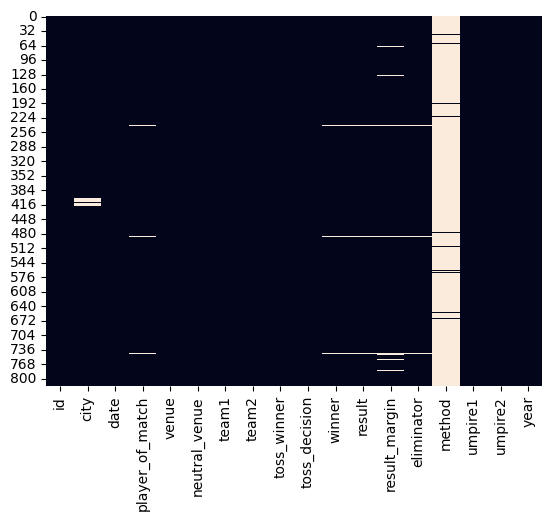

In [12]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(ipl_df.isnull(), cbar=False)
plt.size = (12,6)
plt.show()

In [13]:
# To Know about the null values

q_nulls = pd.read_sql_query('''
SELECT
  SUM(CASE WHEN id IS NULL THEN 1 ELSE 0 END) AS id_nulls,
  SUM(CASE WHEN city IS NULL THEN 1 ELSE 0 END) AS city_nulls,
  SUM(CASE WHEN date IS NULL THEN 1 ELSE 0 END) AS date_nulls,
  SUM(CASE WHEN player_of_match IS NULL THEN 1 ELSE 0 END) AS pom_nulls,
  SUM(CASE WHEN venue IS NULL THEN 1 ELSE 0 END) AS venue_nulls,
  SUM(CASE WHEN team1 IS NULL THEN 1 ELSE 0 END) AS team1_nulls,
  SUM(CASE WHEN team2 IS NULL THEN 1 ELSE 0 END) AS team2_nulls,
  SUM(CASE WHEN toss_winner IS NULL THEN 1 ELSE 0 END) AS toss_winner_nulls,
  SUM(CASE WHEN toss_decision IS NULL THEN 1 ELSE 0 END) AS toss_decision_nulls,
  SUM(CASE WHEN winner IS NULL THEN 1 ELSE 0 END) AS winner_nulls,
  SUM(CASE WHEN result IS NULL THEN 1 ELSE 0 END) AS result_nulls,
  SUM(CASE WHEN result_margin IS NULL THEN 1 ELSE 0 END) AS margin_nulls,
  SUM(CASE WHEN eliminator IS NULL THEN 1 ELSE 0 END) AS eliminator_nulls,
  SUM(CASE WHEN method IS NULL THEN 1 ELSE 0 END) AS method_nulls,
  SUM(CASE WHEN umpire1 IS NULL THEN 1 ELSE 0 END) AS umpire1_nulls,
  SUM(CASE WHEN umpire2 IS NULL THEN 1 ELSE 0 END) AS umpire2_nulls
FROM IPL -- Changed 'df' to 'IPL' to match the table name in the database
''', conn)

q_nulls

,id_nulls,city_nulls,date_nulls,pom_nulls,venue_nulls,team1_nulls,team2_nulls,toss_winner_nulls,toss_decision_nulls,winner_nulls,result_nulls,margin_nulls,eliminator_nulls,method_nulls,umpire1_nulls,umpire2_nulls
0,0,13,0,4,0,0,0,0,0,4,4,17,4,797,0,0


In [14]:
# Replace Null Values
conn.execute('''
UPDATE IPL SET city =
  CASE
    WHEN venue = 'Sharjah Cricket Stadium' THEN 'Sharjah'
    WHEN venue = 'Dubai International Cricket Stadium' THEN 'Dubai'
    ELSE city
  END
WHERE city IS NULL
''')
conn.commit()


# Check update
pd.read_sql_query('''
SELECT COUNT(*) AS null_city_count
FROM IPL
WHERE city IS NULL
''', conn)

,null_city_count
0,0


In [15]:
# Replace Null Values

conn.execute('''
UPDATE IPL
SET player_of_match = 'Match Abandoned'
WHERE player_of_match IS NULL
''')
conn.commit()

# Confirm how many NULLs remain in player_of_match
check_pom_nulls = pd.read_sql_query('''
SELECT COUNT(*) AS remaining_nulls_in_player_of_match
FROM IPL
WHERE player_of_match IS NULL
''', conn)

check_pom_nulls


,remaining_nulls_in_player_of_match
0,0


In [16]:
# Replace Null Values

update_related_columns = conn.execute('''
UPDATE IPL
SET
  winner = CASE WHEN winner IS NULL THEN 'Match Abandoned' ELSE winner END,
  result = CASE WHEN result IS NULL THEN 'Match Abandoned' ELSE result END,
  result_margin = CASE WHEN result_margin IS NULL THEN 'Match Abandoned' ELSE result_margin END,
  eliminator = CASE WHEN eliminator IS NULL THEN 'Match Abandoned' ELSE eliminator END,
  method = CASE WHEN method IS NULL THEN 'Match Abandoned' ELSE method END
WHERE player_of_match = 'Match Abandoned'
''')
conn.commit()

# Check updated rows where player_of_match = 'Match Abandoned'
check_updated = pd.read_sql_query('''
SELECT id, player_of_match, winner, result, result_margin, eliminator, method
FROM IPL
WHERE player_of_match = 'Match Abandoned'
''', conn)

check_updated

,id,player_of_match,winner,result,result_margin,eliminator,method
0,501265,Match Abandoned,Match Abandoned,Match Abandoned,Match Abandoned,Match Abandoned,Match Abandoned
1,829763,Match Abandoned,Match Abandoned,Match Abandoned,Match Abandoned,Match Abandoned,Match Abandoned
2,829813,Match Abandoned,Match Abandoned,Match Abandoned,Match Abandoned,Match Abandoned,Match Abandoned
3,1178424,Match Abandoned,Match Abandoned,Match Abandoned,Match Abandoned,Match Abandoned,Match Abandoned


In [17]:
# Replace Null Values

update_general_match = conn.execute('''
UPDATE IPL
SET method = 'General Match'
WHERE method IS NULL OR method = '0'
''')
conn.commit()

# Confirm update
confirm_update = pd.read_sql_query('''
SELECT method, COUNT(*) as count
FROM IPL
GROUP BY method
''', conn)
confirm_update

,method,count
0,D/L,19
1,General Match,793
2,Match Abandoned,4


In [18]:
# Replace Null Values

update_eliminator = conn.execute ('''
UPDATE IPL
SET eliminator = CASE
    WHEN eliminator = 'Y' THEN 'Super Over Eliminator'
    WHEN eliminator = 'N' THEN 'No Eliminator'
    ELSE eliminator
END
''')
conn.commit()

updated_eliminator_summary = pd.read_sql_query('''
SELECT eliminator, COUNT(*) as count
FROM IPL
GROUP BY eliminator
''', conn)

updated_eliminator_summary

,eliminator,count
0,Match Abandoned,4
1,No Eliminator,799
2,Super Over Eliminator,13


In [19]:
update_result_margin = conn.execute('''
UPDATE IPL
SET result_margin = 0
WHERE result_margin IS NULL
''')
conn.commit()

update_result_margin_summary = pd.read_sql_query('''
SELECT result_margin, COUNT(*) as count
FROM IPL Where result_margin = 0
''', conn)

update_result_margin_summary

,result_margin,count
0,0.0,13


In [20]:
ipl_df = pd.read_sql_query("SELECT * FROM IPL", conn)
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               816 non-null    int64 
 1   city             816 non-null    object
 2   date             816 non-null    object
 3   player_of_match  816 non-null    object
 4   venue            816 non-null    object
 5   neutral_venue    816 non-null    int64 
 6   team1            816 non-null    object
 7   team2            816 non-null    object
 8   toss_winner      816 non-null    object
 9   toss_decision    816 non-null    object
 10  winner           816 non-null    object
 11  result           816 non-null    object
 12  result_margin    816 non-null    object
 13  eliminator       816 non-null    object
 14  method           816 non-null    object
 15  umpire1          816 non-null    object
 16  umpire2          816 non-null    object
 17  year             816 non-null    in

In [21]:
conn = sqlite3.connect('IPL.db')
ipl_df = pd.read_sql_query("SELECT * FROM IPL", conn)
ipl_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
0,335982,Bangalore,2008-04-18 00:00:00,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,No Eliminator,General Match,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19 00:00:00,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,No Eliminator,General Match,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19 00:00:00,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,No Eliminator,General Match,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20 00:00:00,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,No Eliminator,General Match,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20 00:00:00,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,No Eliminator,General Match,BF Bowden,K Hariharan,2008


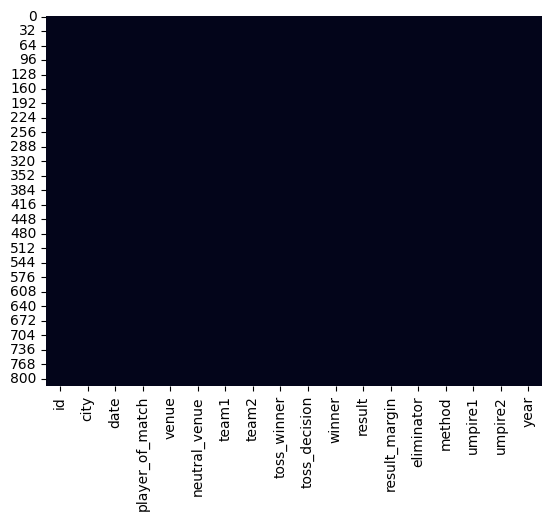

In [22]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(ipl_df.isnull(), cbar=False)
plt.size = (12,6)
plt.show()

## **Visualization**

In [23]:
# Insight 1: Total Matches per Season

q1 = pd.read_sql_query('''
SELECT year, COUNT(*) as total_matches
FROM IPL
GROUP BY year
ORDER BY year
''', conn)

q1

,year,total_matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


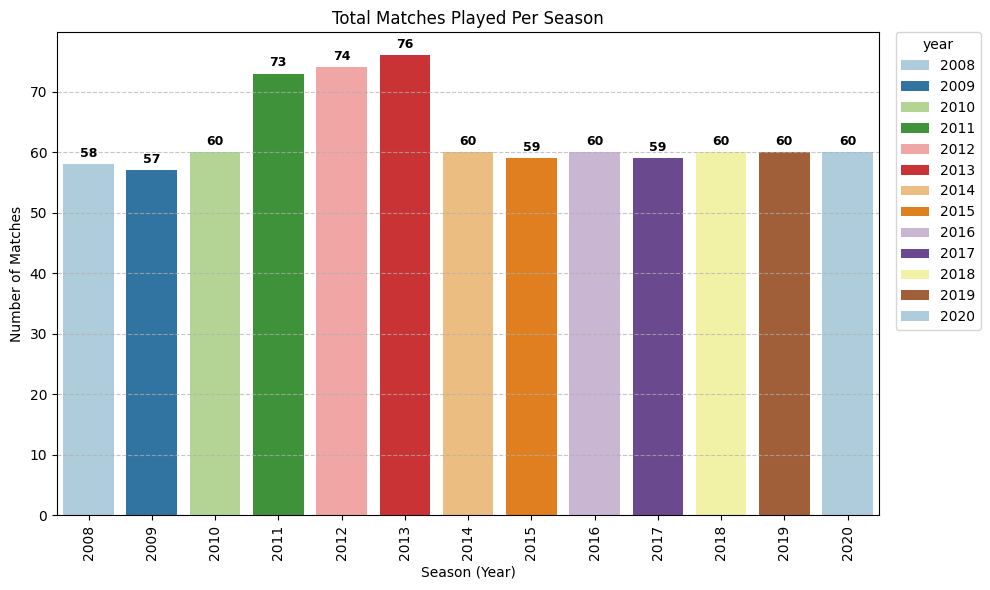

In [24]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=q1, x='year', y='total_matches', palette='Paired', hue='year')

# Add labels on bars
for i in ax.containers:
    ax.bar_label(i, padding=3, fontsize=9, fontweight='bold')

plt.title('Total Matches Played Per Season')
plt.xlabel('Season (Year)')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='year', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()



In [25]:
num_cities = pd.read_sql_query('''
SELECT COUNT(DISTINCT city) as number_of_cities
FROM IPL
''', conn)

num_cities

,number_of_cities
0,32


In [26]:
# Insight 2: Total Matches played in each City

q2 = pd.read_sql_query('''
SELECT city, COUNT(*) as matches
FROM IPL
GROUP BY city
ORDER BY matches DESC
''', conn)
q2

,city,matches
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,65
4,Hyderabad,64
5,Chennai,57
6,Chandigarh,56
7,Jaipur,47
8,Pune,38
9,Dubai,33


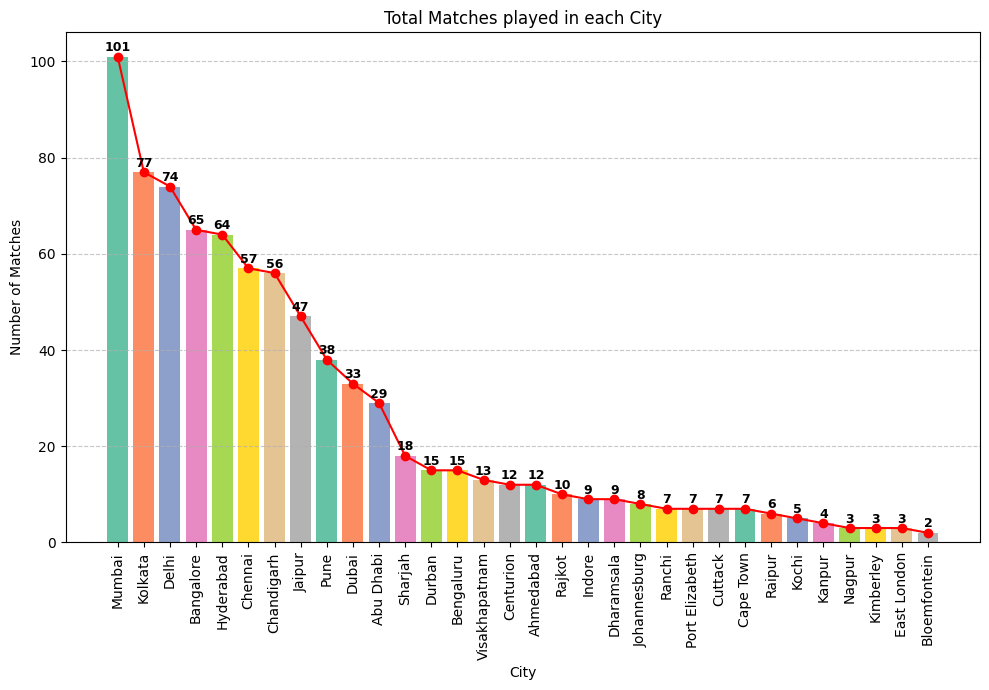

In [27]:
plt.figure(figsize=(10,7))

# Create the bar chart (as before)
plt.bar(q2['city'], q2['matches'], color=plt.cm.Set2.colors[:len(q2)], label='Matches (Bars)')

# Create a line plot on the same axes
# The x-axis for plot will be the index of the cities
plt.plot(q2['city'], q2['matches'], color='red', marker='o', linestyle='-', label='Matches (Line)') # Added line plot

for i in range(len(q2)):
    plt.text(i, q2['matches'][i] + 0.5, str(q2['matches'][i]),
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Total Matches played in each City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
# Insight 3: Player of the Match Awards

q3 = pd.read_sql_query('''
select player_of_match, count(*) as awards from ipl
group by player_of_match
order by awards desc
limit 10
''', conn)

q3

,player_of_match,awards
0,AB de Villiers,23
1,CH Gayle,22
2,RG Sharma,18
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,16
7,SK Raina,14
8,V Kohli,13
9,G Gambhir,13


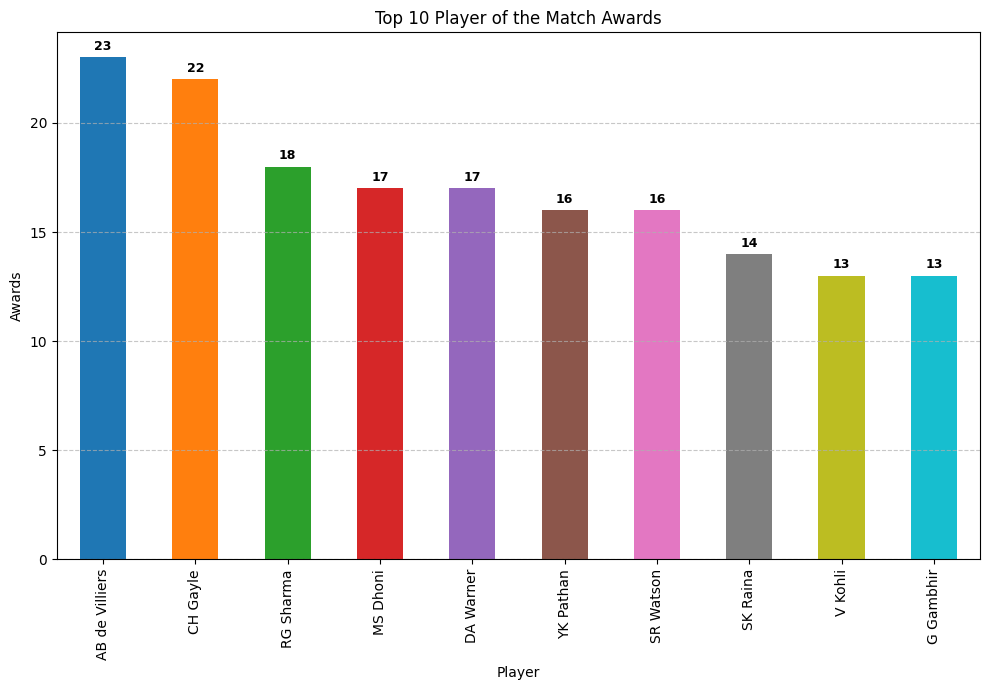

In [29]:
colors = cm.tab10(range(len(q3)))
ax = q3.plot(kind = 'bar', x='player_of_match', y ='awards', color= colors, figsize =(10,7))

for i in ax.containers:
    ax.bar_label(i, padding=3, fontsize=9, fontweight='bold')
plt.title('Top 10 Player of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Awards')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend().remove()
plt.tight_layout()
plt.show()

In [30]:

# Insight 4: Most Wins by Teams
q4 = pd.read_sql_query('''
SELECT winner, COUNT(*) as wins
FROM IPL
WHERE winner IS NOT NULL  -- Exclude rows where winner is NULL
GROUP BY winner
ORDER BY wins DESC
''', conn)
q4

,winner,wins
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


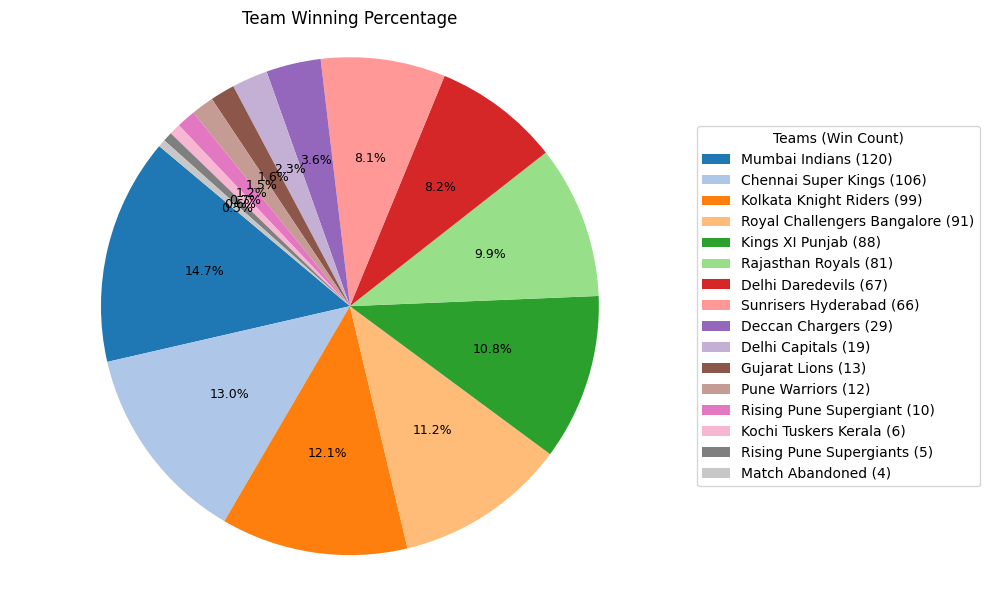

In [31]:
# Prepare data
labels = q4['winner']
sizes = q4['wins']
colors = plt.cm.tab20.colors[:len(q4)]

# Create pie chart
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(
    sizes, labels=None, autopct='%1.1f%%', colors=colors,
    startangle=140, textprops={'fontsize': 9}
)

# Create custom legend with count
legend_labels = [f"{labels[i]} ({sizes[i]})" for i in range(len(q4))]
plt.legend(patches, legend_labels, title="Teams (Win Count)", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Team Winning Percentage')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()

In [32]:
q5 = pd.read_sql_query('''
SELECT toss_winner, COUNT(*) as toss_wins
FROM IPL
GROUP BY toss_winner
ORDER BY toss_wins DESC
''', conn)
q5

,toss_winner,toss_wins
0,Mumbai Indians,106
1,Kolkata Knight Riders,98
2,Chennai Super Kings,97
3,Royal Challengers Bangalore,87
4,Rajasthan Royals,87
5,Kings XI Punjab,85
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,57
8,Deccan Chargers,43
9,Pune Warriors,20


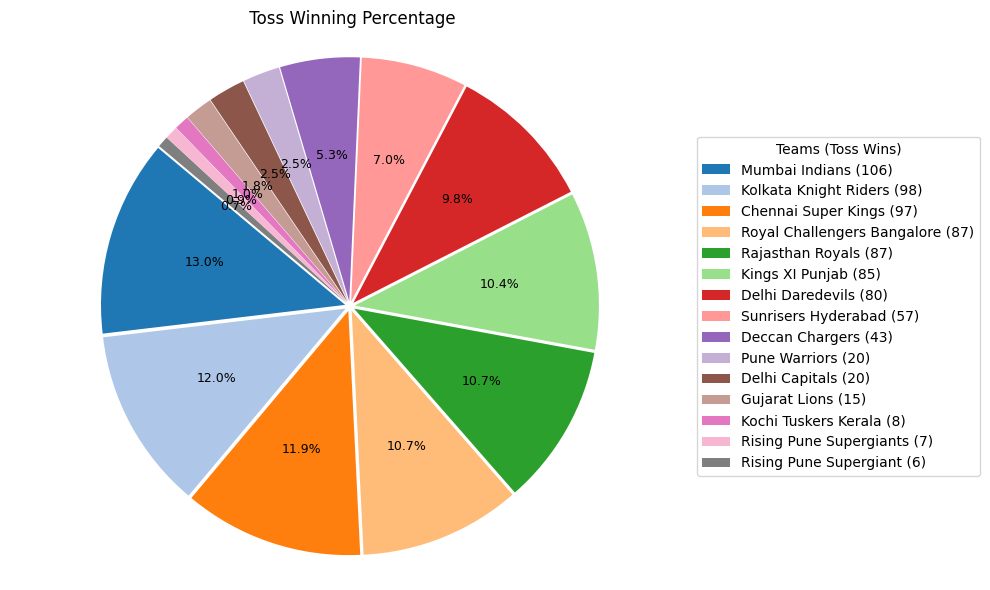

In [33]:
# Prepare data
labels = q5['toss_winner']
sizes = q5['toss_wins']
colors = plt.cm.tab20.colors[:len(q5)]

# Create pie chart
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(
    sizes, labels=None, autopct='%1.1f%%', colors=colors,
    startangle=140, textprops={'fontsize': 9}, explode = [0.02]*len(q5)
)

# Create custom legend with count
legend_labels = [f"{labels[i]} ({sizes[i]})" for i in range(len(q5))]
plt.legend(patches, legend_labels, title="Teams (Toss Wins)", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title(' Toss Winning Percentage')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()

In [34]:
q6 = pd.read_sql_query('''
SELECT
  toss_decision,
  COUNT(*) as total_taken,
  SUM(CASE WHEN toss_winner = winner THEN 1 ELSE 0 END) as match_won,
  ROUND(SUM(CASE WHEN toss_winner = winner THEN 1.0 ELSE 0 END) * 100.0 / COUNT(*), 2) as win_percentage
FROM IPL
GROUP BY toss_decision
''', conn)
q6


,toss_decision,total_taken,match_won,win_percentage
0,bat,320,145,45.31
1,field,496,273,55.04


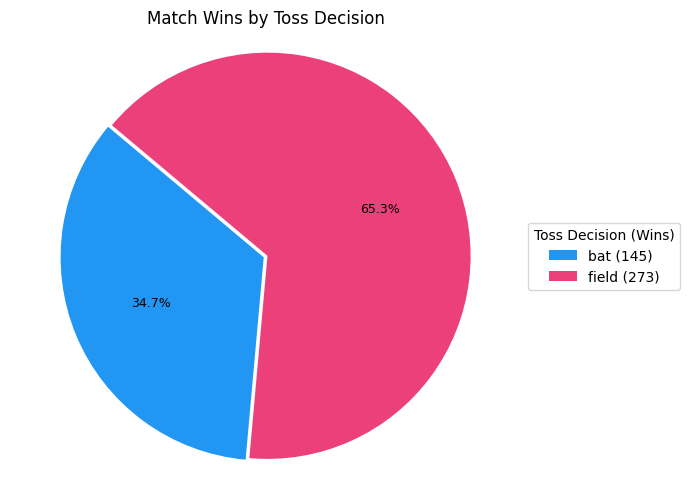

In [35]:
# Prepare data for pie chart
labels = q6['toss_decision']
sizes = q6['match_won']
colors = ['#2196F3', '#EC407A']
explode = [0.01] * len(q6)

# Create pie chart
plt.figure(figsize=(7,5))
patches, texts, autotexts = plt.pie(
    sizes, labels=None, autopct='%1.1f%%', colors=colors,
    explode=explode, startangle=140, textprops={'fontsize': 9}
)

# Custom legend showing count
legend_labels = [f"{labels[i]} ({sizes[i]})" for i in range(len(q6))]
plt.legend(patches, legend_labels, title="Toss Decision (Wins)", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Match Wins by Toss Decision')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [36]:
q7 = pd.read_sql_query('''
SELECT venue, COUNT(*) as matches
FROM IPL
GROUP BY venue
ORDER BY matches DESC
''', conn)

q7

,venue,matches
0,Eden Gardens,77
1,Feroz Shah Kotla,74
2,Wankhede Stadium,73
3,M Chinnaswamy Stadium,65
4,"Rajiv Gandhi International Stadium, Uppal",64
5,"MA Chidambaram Stadium, Chepauk",57
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Dubai International Cricket Stadium,33
9,Sheikh Zayed Stadium,29


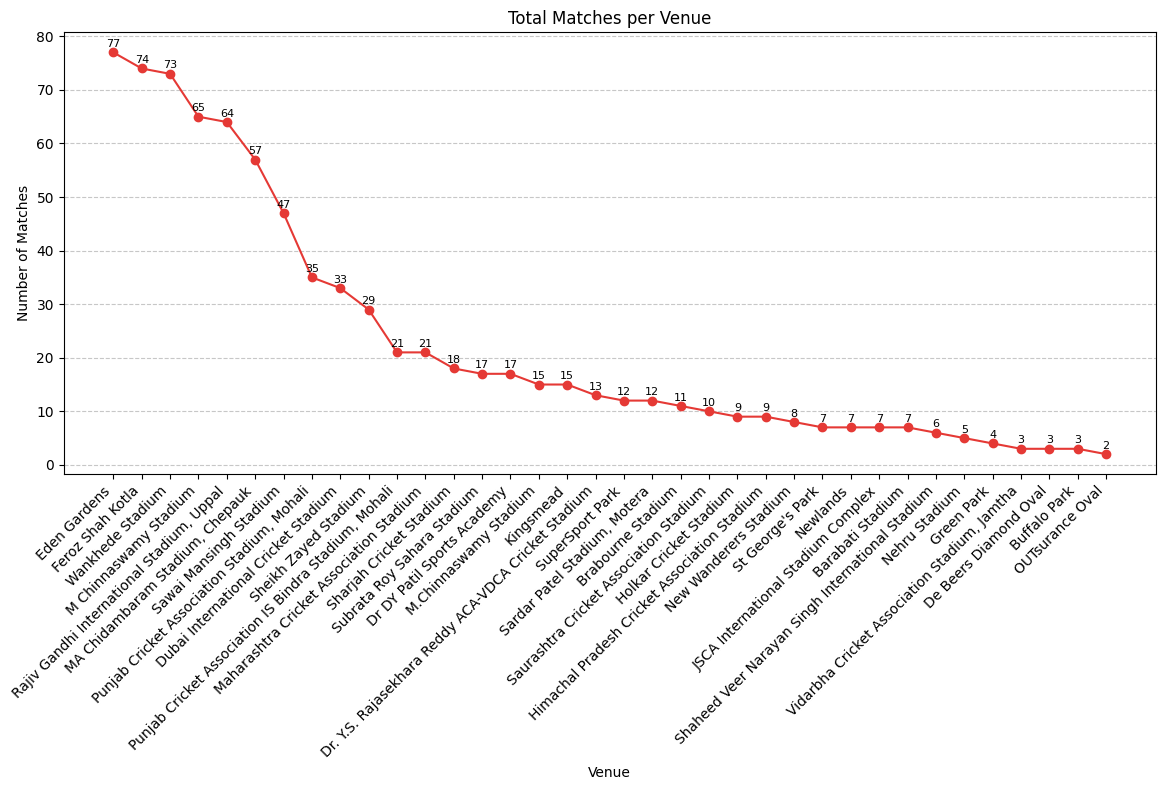

In [37]:
# Line plot for number of matches per venue
plt.figure(figsize=(12,8))
plt.plot(q7['venue'], q7['matches'], marker='o', linestyle='-', color='#E53935')

plt.title('Total Matches per Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each point with the match count
for i in range(len(q7)):
    plt.text(i, q7['matches'][i] + 1, str(q7['matches'][i]), ha='center', fontsize=8)

plt.tight_layout()
plt.show()


In [38]:
# Query to calculate win percentage batting first vs bowling first, grouped by venue
q8 = '''
SELECT
    venue,
    COUNT(*) as total_matches,

    -- Wins by batting first
    SUM(CASE
        WHEN toss_winner = winner AND toss_decision = 'bat' THEN 1
        ELSE 0
    END) as wins_batting_first,

    -- Wins by fielding first
    SUM(CASE
        WHEN toss_winner = winner AND toss_decision = 'field' THEN 1
        ELSE 0
    END) as wins_fielding_first,

    -- Win percentage batting first
    ROUND(SUM(CASE
        WHEN toss_winner = winner AND toss_decision = 'bat' THEN 1.0
        ELSE 0
    END) * 100.0 / COUNT(*), 2) as win_pct_batting_first,

    -- Win percentage fielding first
    ROUND(SUM(CASE
        WHEN toss_winner = winner AND toss_decision = 'field' THEN 1.0
        ELSE 0
    END) * 100.0 / COUNT(*), 2) as win_pct_fielding_first

FROM IPL
GROUP BY venue
ORDER BY total_matches DESC
'''
venue_win_analysis = pd.read_sql_query(q8, conn)
venue_win_analysis

,venue,total_matches,wins_batting_first,wins_fielding_first,win_pct_batting_first,win_pct_fielding_first
0,Eden Gardens,77,12,31,15.58,40.26
1,Feroz Shah Kotla,74,15,23,20.27,31.08
2,Wankhede Stadium,73,11,26,15.07,35.62
3,M Chinnaswamy Stadium,65,3,32,4.62,49.23
4,"Rajiv Gandhi International Stadium, Uppal",64,6,15,9.38,23.44
5,"MA Chidambaram Stadium, Chepauk",57,22,8,38.60,14.04
6,Sawai Mansingh Stadium,47,6,19,12.77,40.43
7,"Punjab Cricket Association Stadium, Mohali",35,5,11,14.29,31.43
8,Dubai International Cricket Stadium,33,6,5,18.18,15.15
9,Sheikh Zayed Stadium,29,7,8,24.14,27.59


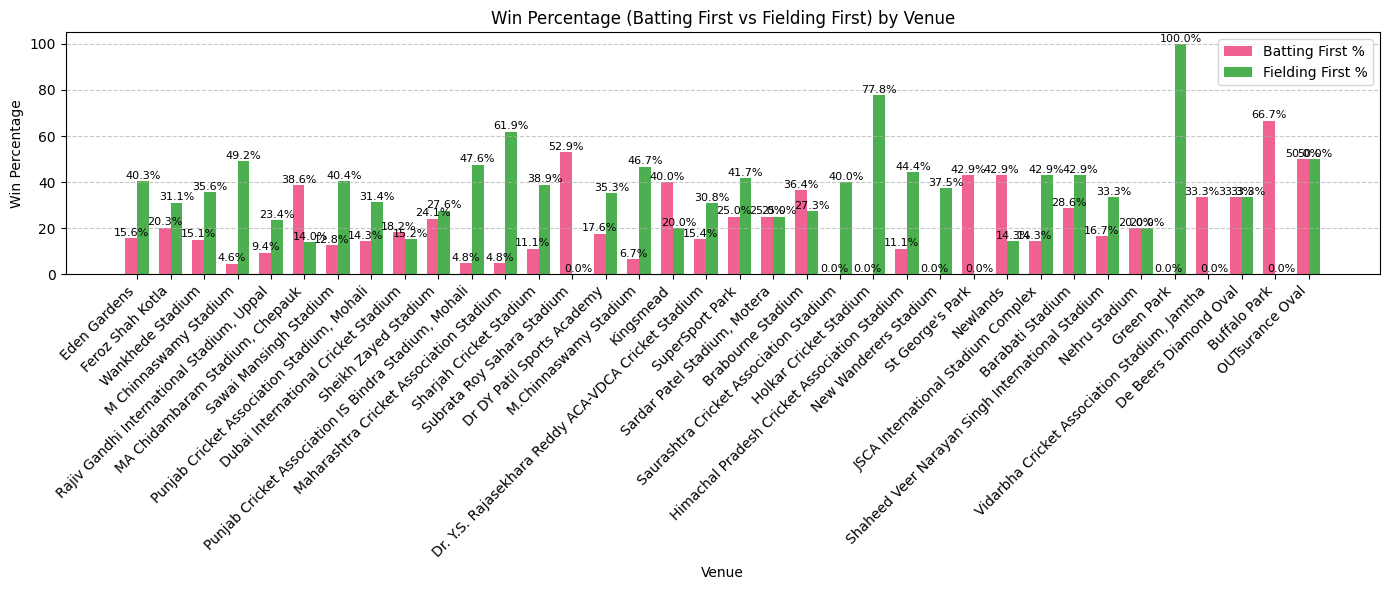

In [39]:
venues = venue_win_analysis['venue']
batting_pct = venue_win_analysis['win_pct_batting_first']
fielding_pct = venue_win_analysis['win_pct_fielding_first']

x = range(len(venues))
width = 0.35

# Plot grouped bar chart
plt.figure(figsize=(14,6))
bars1 = plt.bar([i - width/2 for i in x], batting_pct, width=width, label='Batting First %', color='#F06292')
bars2 = plt.bar([i + width/2 for i in x], fielding_pct, width=width, label='Fielding First %', color='#4CAF50')

plt.xlabel('Venue')
plt.ylabel('Win Percentage')
plt.title('Win Percentage (Batting First vs Fielding First) by Venue')
plt.xticks(ticks=x, labels=venues, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In [40]:
q9 = pd.read_sql_query('''
WITH team_season_wins AS (
    SELECT
        winner AS team,
        STRFTIME('%Y', date) AS season_year,
        COUNT(*) AS wins
    FROM IPL
    WHERE winner IS NOT NULL AND winner != 'Match Abandoned'
    GROUP BY winner, season_year
),
team_season_summary AS (
    SELECT
        team,
        SUM(wins) AS total_wins,
        COUNT(season_year) AS seasons_played,
        ROUND(SUM(wins) * 1.0 / COUNT(season_year), 2) AS avg_wins_per_season
    FROM team_season_wins
    GROUP BY team
    HAVING seasons_played >= 2
)
SELECT *
FROM team_season_summary
ORDER BY total_wins DESC

''',conn)

q9

,team,total_wins,seasons_played,avg_wins_per_season
0,Mumbai Indians,120,13,9.23
1,Chennai Super Kings,106,11,9.64
2,Kolkata Knight Riders,99,13,7.62
3,Royal Challengers Bangalore,91,13,7.00
4,Kings XI Punjab,88,13,6.77
5,Rajasthan Royals,81,11,7.36
6,Delhi Daredevils,67,11,6.09
7,Sunrisers Hyderabad,66,8,8.25
8,Deccan Chargers,29,5,5.80
9,Delhi Capitals,19,2,9.50


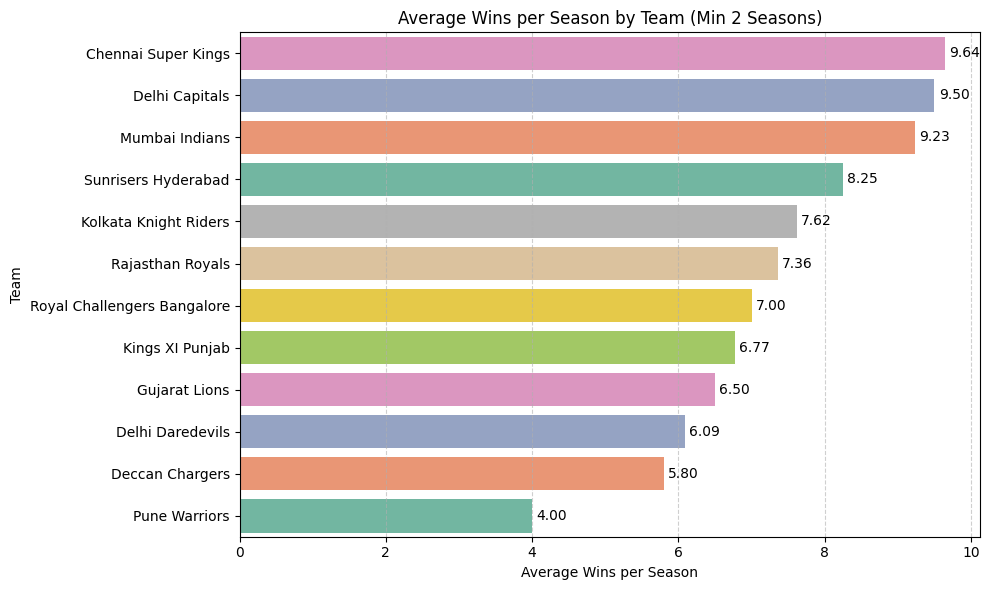

In [41]:
# Sort data for better visual in seaborn
data = q9.sort_values(by='avg_wins_per_season', ascending=False)

# Create seaborn horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot( data=data, x='avg_wins_per_season', hue = 'avg_wins_per_season', y='team', palette='Set2')

# Add labels on bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)
ax.legend_.remove()
plt.title('Average Wins per Season by Team (Min 2 Seasons)')
plt.xlabel('Average Wins per Season')
plt.ylabel('Team')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [42]:
q10 = pd.read_sql_query('''
select case
when winner = team1 then team2
when winner = team2 then team1
end as loser, count(*) as loss_count

from ipl
where winner is not null and winner!= "Match Abandoned"
group by loser
order by loss_count desc
''',conn)

q10

,loser,loss_count
0,Kings XI Punjab,102
1,Royal Challengers Bangalore,101
2,Kolkata Knight Riders,93
3,Delhi Daredevils,92
4,Mumbai Indians,83
5,Rajasthan Royals,78
6,Chennai Super Kings,72
7,Sunrisers Hyderabad,58
8,Deccan Chargers,46
9,Pune Warriors,33


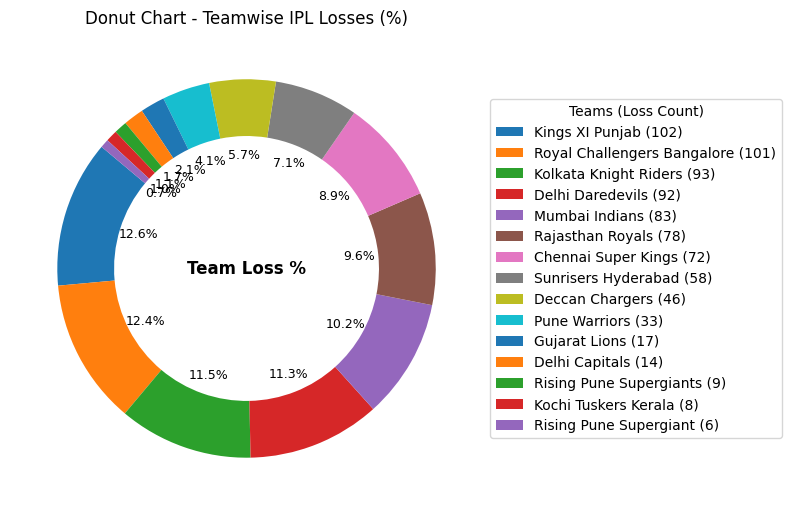

In [43]:
# Prepare data
labels = q10['loser']
sizes = q10['loss_count']

# Custom legend labels: "Team (Loss Count)"
legend_labels = [f"{labels[i]} ({sizes[i]})" for i in range(len(labels))]

# Create donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie( sizes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3), textprops={'fontsize': 9})

# Add custom legend with team + count
plt.legend(wedges, legend_labels, title="Teams (Loss Count)", loc="center left", bbox_to_anchor=(1, 0.5))

# Center text
plt.text(0, 0, 'Team Loss %', ha='center', va='center', fontsize=12, fontweight='bold')

plt.title('Donut Chart - Teamwise IPL Losses (%)')
plt.tight_layout()
plt.show()


In [44]:
q11 = pd.read_sql_query ('''
WITH team_losses AS (
    SELECT
        CASE
            WHEN winner = team1 THEN team2
            WHEN winner = team2 THEN team1
        END AS loser,
        STRFTIME('%Y', date) AS season_year
    FROM IPL
    WHERE winner IS NOT NULL AND winner != 'Match Abandoned'
),
team_loss_summary AS (
    SELECT
        loser AS team,
        COUNT(*) AS total_losses,
        COUNT(DISTINCT season_year) AS seasons_played,
        ROUND(COUNT(*) * 1.0 / COUNT(DISTINCT season_year), 2) AS avg_losses_per_season
    FROM team_losses
    GROUP BY team
    HAVING seasons_played >= 2
)
SELECT *
FROM team_loss_summary
ORDER BY avg_losses_per_season DESC

''', conn)

q11

,team,total_losses,seasons_played,avg_losses_per_season
0,Pune Warriors,33,3,11.00
1,Deccan Chargers,46,5,9.20
2,Gujarat Lions,17,2,8.50
3,Delhi Daredevils,92,11,8.36
4,Kings XI Punjab,102,13,7.85
5,Royal Challengers Bangalore,101,13,7.77
6,Sunrisers Hyderabad,58,8,7.25
7,Kolkata Knight Riders,93,13,7.15
8,Rajasthan Royals,78,11,7.09
9,Delhi Capitals,14,2,7.00


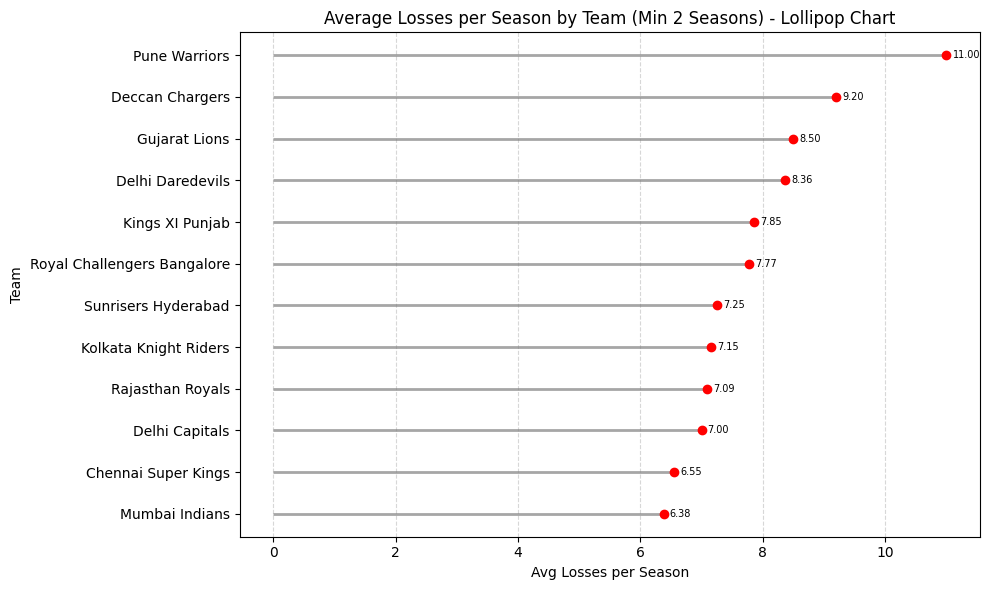

In [45]:
# Sort q11 DataFrame for cleaner visual
data = q11.sort_values(by='avg_losses_per_season', ascending=True)

# Create Lollipop Chart
plt.figure(figsize=(10, 6))
# Use 'data' DataFrame instead of 'df'
plt.hlines(y=data['team'], xmin=0, xmax=data['avg_losses_per_season'], color='gray', alpha=0.7, linewidth=2)
plt.plot(data['avg_losses_per_season'], data['team'], 'o', markersize=6, color='red')

# Add value labels
for index, value in enumerate(data['avg_losses_per_season']):
    plt.text(value + 0.1, index, f"{value:.2f}", va='center', fontsize=7)

plt.title('Average Losses per Season by Team (Min 2 Seasons) - Lollipop Chart')
plt.xlabel('Avg Losses per Season')
plt.ylabel('Team')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [46]:
q12 = pd.read_sql_query ('''
select method, count(*) as count from ipl
group by method
order by count desc
''', conn)

q12

,method,count
0,General Match,793
1,D/L,19
2,Match Abandoned,4


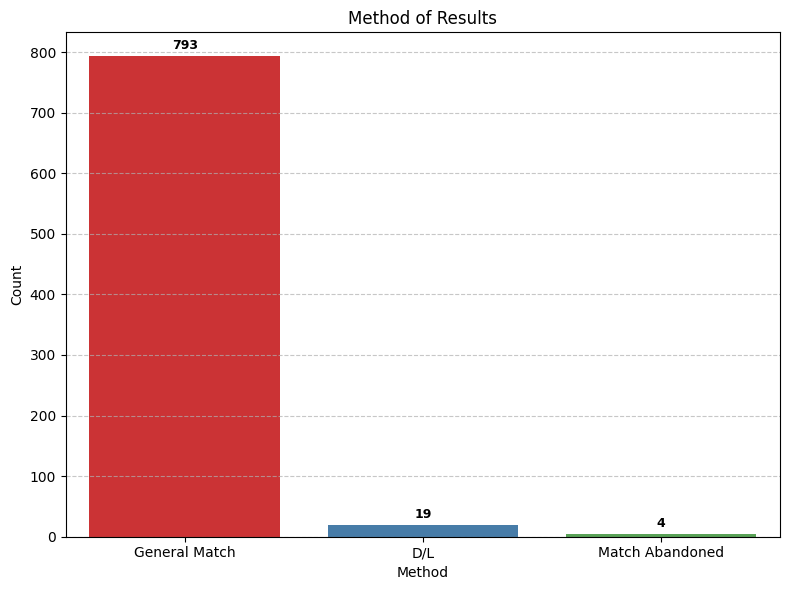

In [47]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=q12, x='method', y='count', palette='Set1', hue = 'method')

for i in ax.containers:
    ax.bar_label(i, padding=3, fontsize=9, fontweight='bold')

plt.title('Method of Results')
plt.xlabel('Method')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [48]:
q13 =  pd.read_sql_query('''
WITH all_umpires as (
  select umpire1 as umpire from ipl where umpire1 is not null union all
  select umpire2 as umpire from ipl where umpire2 is not null ),

umpire_totals as (
    select umpire, count (*) as total_matches
    from all_umpires
    group by umpire),

overall_total as (
  select sum(total_matches) as total from umpire_totals)

select
  u.umpire,
  u.total_matches,
  round(u.total_matches*100.0 / t.total,1) as contribution_percent
from umpire_totals u, overall_total t
order by u.total_matches desc

''', conn)

q13

,umpire,total_matches,contribution_percent
0,S Ravi,121,7.4
1,HDPK Dharmasena,94,5.8
2,AK Chaudhary,87,5.3
3,C Shamshuddin,82,5.0
4,M Erasmus,65,4.0
5,CK Nandan,57,3.5
6,Nitin Menon,57,3.5
7,SJA Taufel,55,3.4
8,Asad Rauf,51,3.1
9,VA Kulkarni,50,3.1


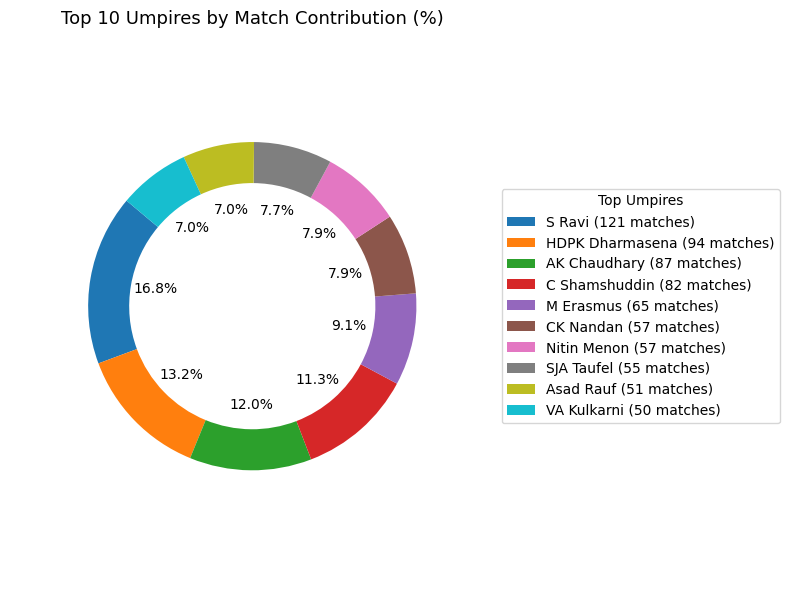

In [49]:
# Donut chart with larger gap by reducing the width more
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    q13.head(10)['contribution_percent'],
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.25),  # Smaller width => larger center gap
    textprops={'fontsize': 10}
)

# Custom legend with match counts
legend_labels = [
    f"{row['umpire']} ({row['total_matches']} matches)"
    for _, row in q13.head(10).iterrows()
]

# Add the legend to the left
ax.legend(wedges, legend_labels, title="Top Umpires", loc="center left", bbox_to_anchor=(1, 0.5))

ax.set_title("Top 10 Umpires by Match Contribution (%)", fontsize=13)
ax.axis('equal')
plt.tight_layout()
plt.show()


### **“Guidance doesn’t just come from books or lessons, but from mentors like you who illuminate the path with wisdom, patience, and belief. Thank you, Abhishek Sir, for being that guiding light throughout this journey. This project might have ended, but the learning you gifted will stay with me forever.”**

#### **— With heartfelt gratitude, Lokesh**



<!-- Project end -->